# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Define a list of city names and country codes
cities = [("New York", "US"), ("Los Angeles", "US"), ("Paris", "FR"), ("Tokyo", "JP"), ("Sydney", "AU")]

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, (city, country) in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city},{country}&units=imperial&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Country": country,
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | New York
Processing Record 2 of Set 1 | Los Angeles
Processing Record 3 of Set 1 | Paris
Processing Record 4 of Set 1 | Tokyo
Processing Record 5 of Set 1 | Sydney
-----------------------------
Data Retrieval Complete      
-----------------------------


In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          5
Country       5
Lat           5
Lng           5
Max Temp      5
Humidity      5
Cloudiness    5
Wind Speed    5
Date          5
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,New York,US,40.7143,-74.0060,69.51,28,0,9.22,1681148800
1,Los Angeles,US,34.0522,-118.2437,87.21,69,40,5.75,1681148838
2,Paris,FR,48.8534,2.3488,58.08,92,100,13.80,1681149136
3,Tokyo,JP,35.6895,139.6917,61.56,63,0,16.11,1681148886
4,Sydney,AU,-33.8679,151.2073,54.63,68,0,9.22,1681148930


In [14]:
import os

if not os.path.exists("output_data"):
    os.mkdir("output_data")
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")


In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")


In [16]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City_ID,,,,,,,,,
0,New York,US,40.7143,-74.0060,69.51,28,0,9.22,1681148800
1,Los Angeles,US,34.0522,-118.2437,87.21,69,40,5.75,1681148838
2,Paris,FR,48.8534,2.3488,58.08,92,100,13.80,1681149136
3,Tokyo,JP,35.6895,139.6917,61.56,63,0,16.11,1681148886
4,Sydney,AU,-33.8679,151.2073,54.63,68,0,9.22,1681148930


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

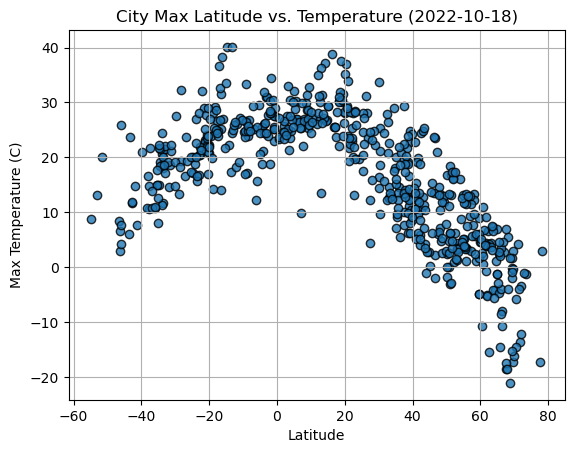

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

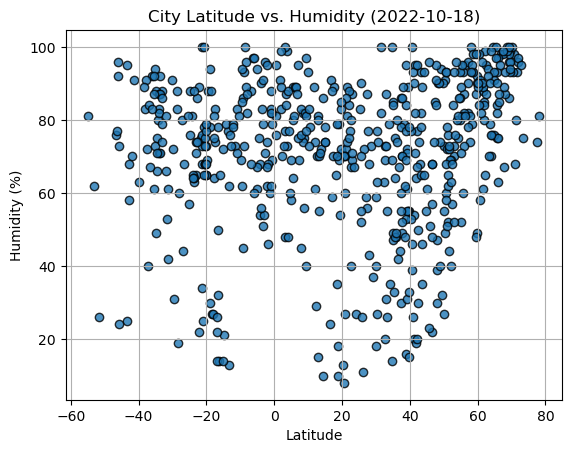

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

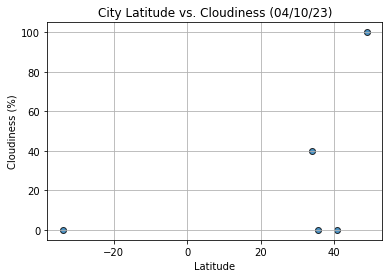

In [17]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

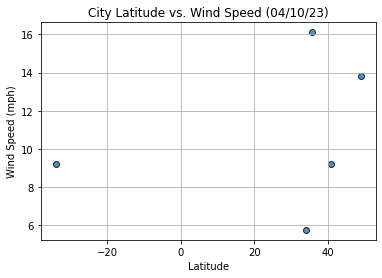

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress

def create_linear_regression_plot(x_values, y_values, x_label, y_label, title, file_name):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Calculate the line of best fit
    fit = slope * x_values + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Add the line of best fit to the scatter plot
    plt.plot(x_values, fit, "--", color="red")
    
    # Set the x and y labels and the title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Print the r-squared value
    print(f"The r-squared value is: {r_value**2}")
    
    # Save the figure
    plt.savefig(f"output_data/{file_name}.png")
    
    # Show the plot
    plt.show()


In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
northern_hemi_df.head()


# Display sample data
northern_hemi_df.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City_ID,,,,,,,,,
0,New York,US,40.7143,-74.0060,69.51,28,0,9.22,1681148800
1,Los Angeles,US,34.0522,-118.2437,87.21,69,40,5.75,1681148838
2,Paris,FR,48.8534,2.3488,58.08,92,100,13.80,1681149136
3,Tokyo,JP,35.6895,139.6917,61.56,63,0,16.11,1681148886


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]


# Display sample data
southern_hemi_df.head()

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City_ID,,,,,,,,,
4,Sydney,AU,-33.8679,151.2073,54.63,68,0,9.22,1681148930


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6653087548006573


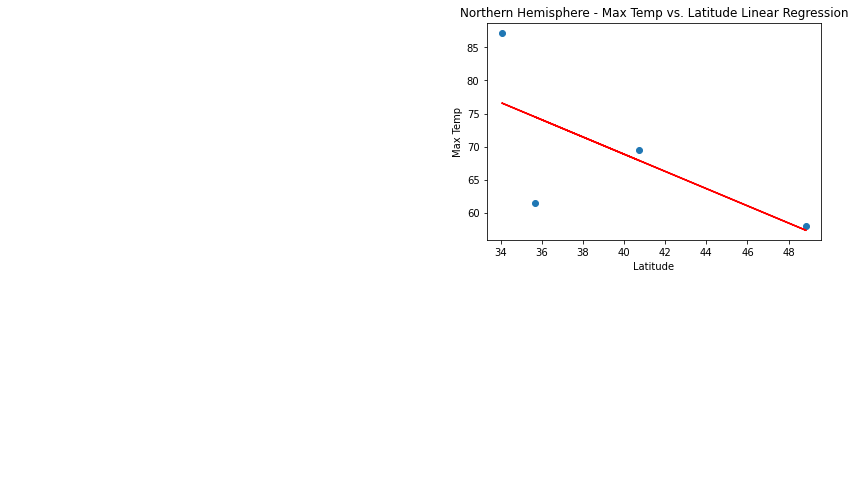

In [24]:
# Linear regression on Northern Hemisphere
# Perform linear regression on latitude vs maximum temperature
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create scatter plot with linear regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Annotate the plot
plt.annotate(line_eq, (10, 20), fontsize=15, color="red")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Print r value
print(f"The r-value is: {rvalue}")

# Show plot
plt.show()


C:\Users\maclo\anaconda--3\envs\PythonData\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\maclo\anaconda--3\envs\PythonData\lib\site-packages\scipy\stats\_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\maclo\anaconda--3\envs\PythonData\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\maclo\anaconda--3\envs\PythonData\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


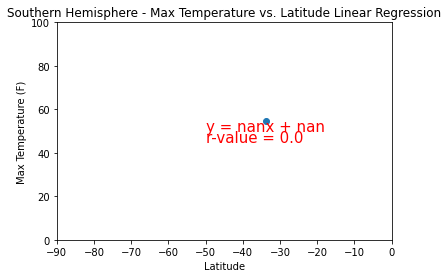

In [27]:
# Perform a linear regression on temperature vs. latitude for Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create a string for the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create the scatter plot
plt.scatter(x_values,y_values)

# Plot the regression line
plt.plot(x_values,regress_values,"r-")

# Annotate the plot with the line equation and r-value
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")
plt.annotate(f"r-value = {round(rvalue,2)}",(-50,45),fontsize=15,color="red")

# Set the x and y limits
plt.xlim(-90,0)
plt.ylim(0,100)

# Set the plot title and labels
plt.title("Southern Hemisphere - Max Temperature vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Show plot
plt.show()


**Discussion about the linear relationship:

### Humidity vs. Latitude Linear Regression Plot

In [29]:
# Northern Hemisphere
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(45,15))
plt.savefig("output_data/Fig6.png")
plt.show()


NameError: name 'plot_linear_regression' is not defined

The r-value is: 0.0002808747046324607


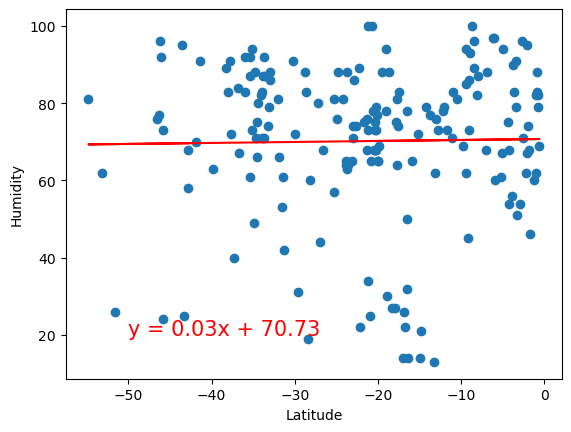

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


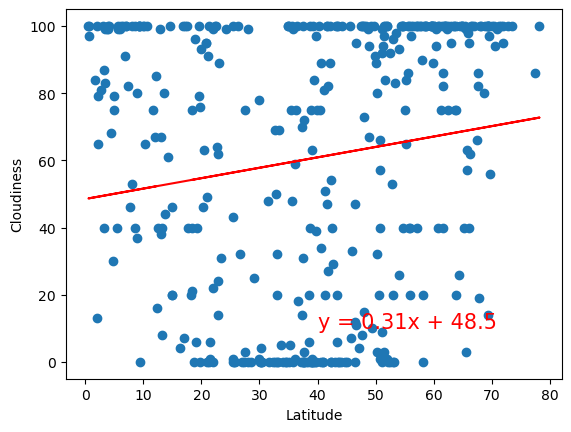

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


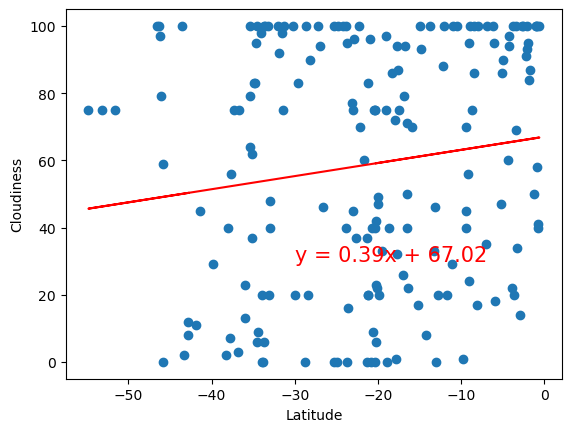

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


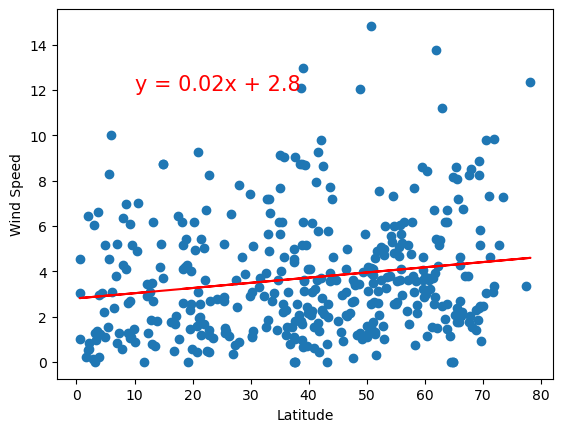

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


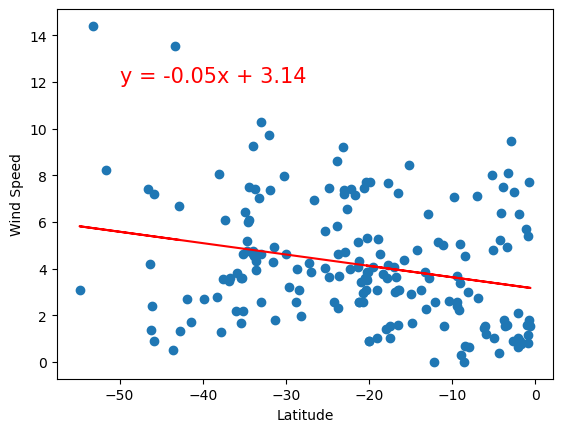

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE